In [63]:
from pathlib import Path

import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import missingno as msno
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# pd.options.plotting.backend = "plotly"
plt.style.use('bmh')
pd.set_option("display.max_columns", 100)
warnings.filterwarnings('ignore')

In [64]:
features_df = pd.read_csv(
    "data/train_values.csv", 
    index_col="building_id"
)
labels_df = pd.read_csv(
    "data/train_labels.csv", 
    index_col="building_id"
)
test_features_df = pd.read_csv(
    "data/test_values.csv", 
    index_col="building_id")

# Preprocessing Data

In [65]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
object_cols = features_df.columns[features_df.dtypes == "object"].values
features_numeric = features_df[numeric_cols]
features_object = features_df[object_cols]
for col in object_cols:
    features_object[col] = features_object[col].astype('category')
    features_df[col] = features_object[col].cat.codes
    test_features_df[col] = test_features_df[col].astype('category')
    test_features_df[col] = test_features_df[col].cat.codes

In [66]:
df = pd.merge(features_df, labels_df, left_index=True, right_index=True)
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
object_cols = features_df.columns[features_df.dtypes == "object"].values

In [ ]:
# For Catboost
features_df[object_cols] = features_df[object_cols].fillna('None')
test_features_df[object_cols] = test_features_df[object_cols].fillna('None')

# EDA

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

<AxesSubplot:>

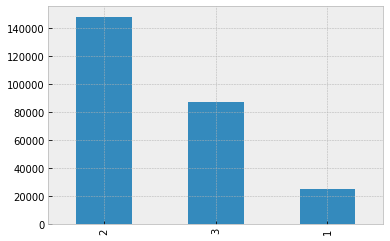

In [34]:
df['damage_grade'].value_counts().plot(kind='bar')

In [48]:
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

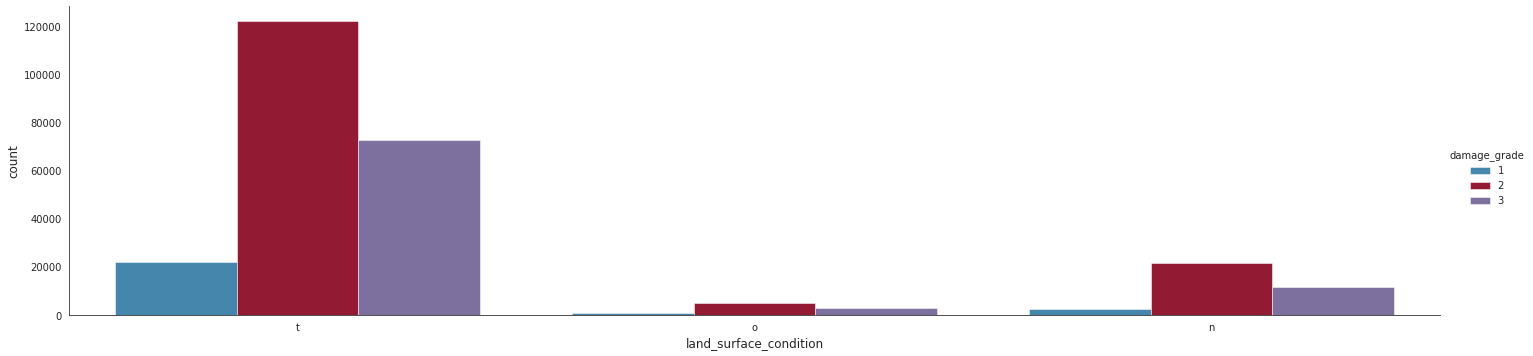

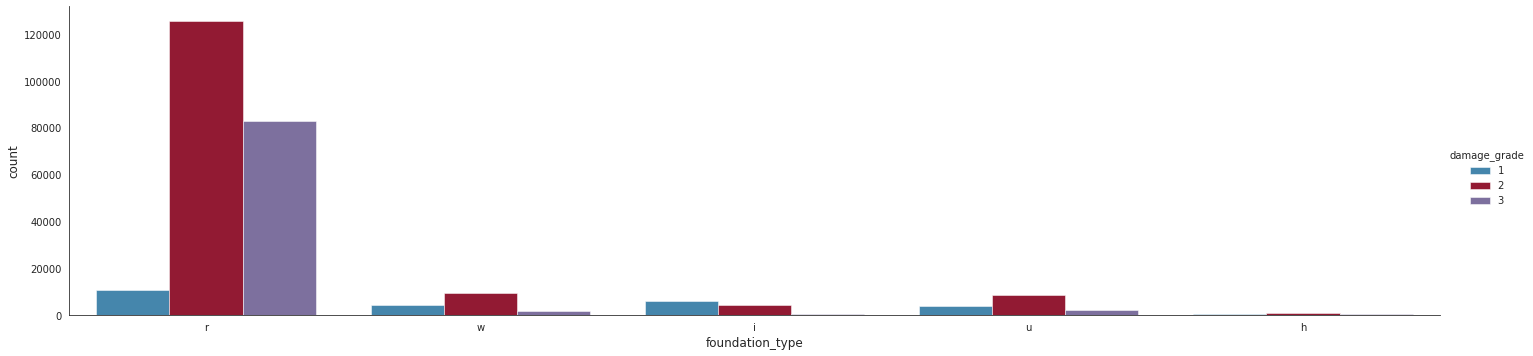

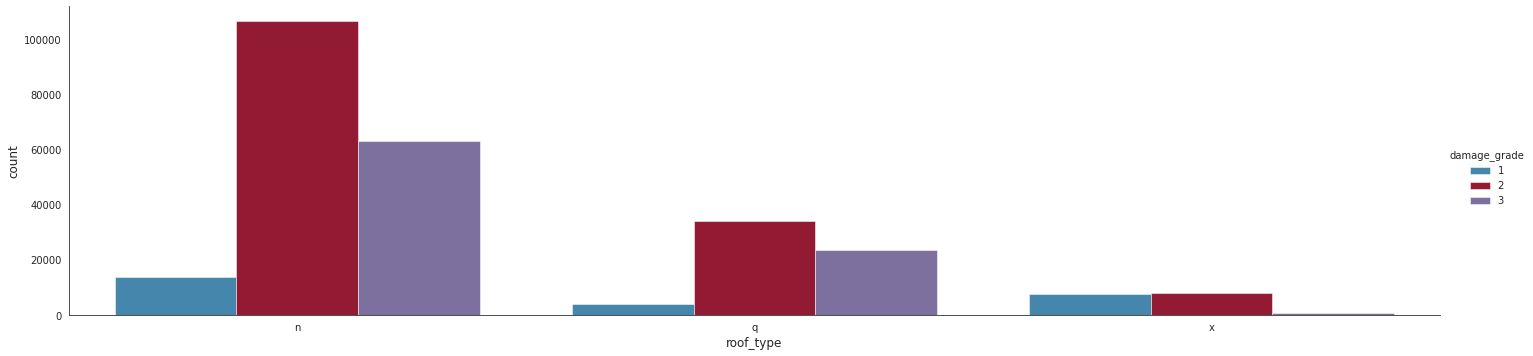

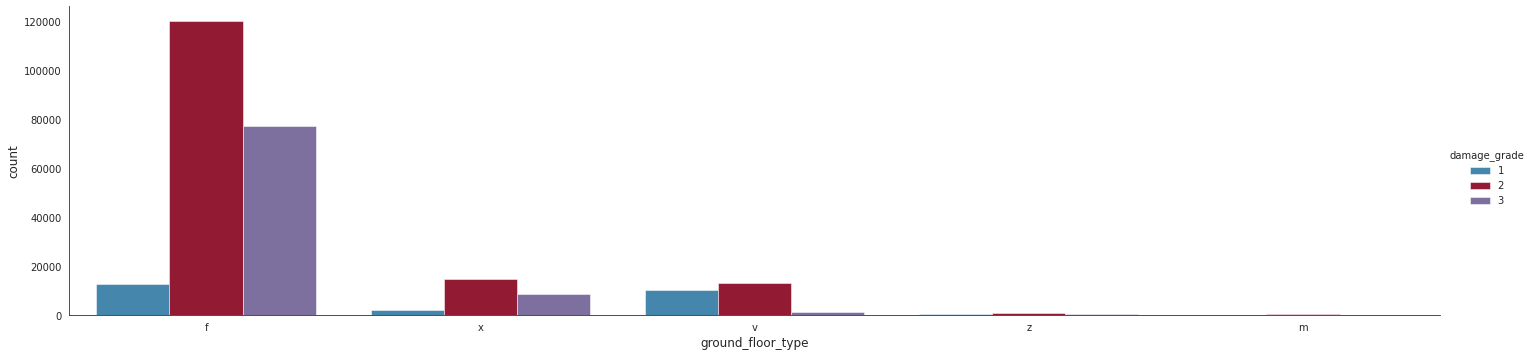

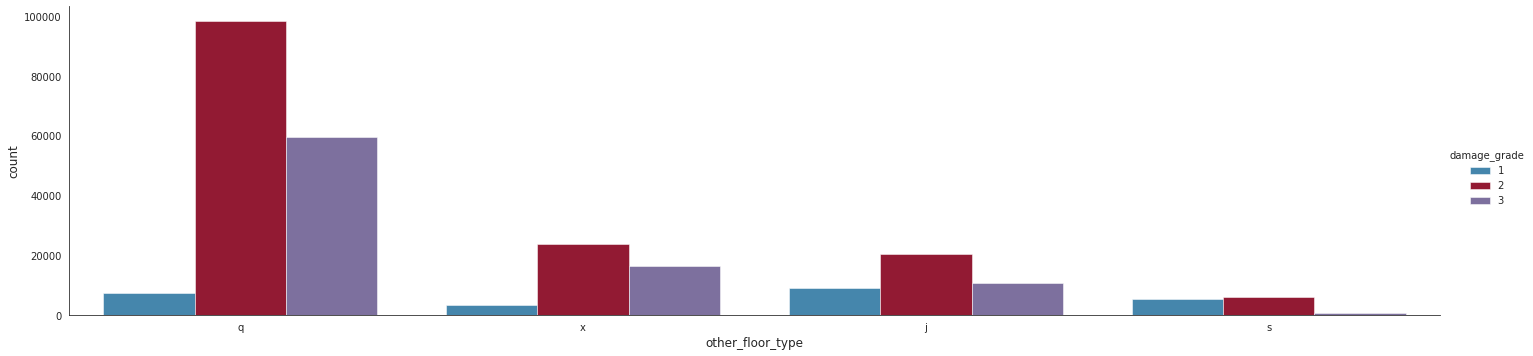

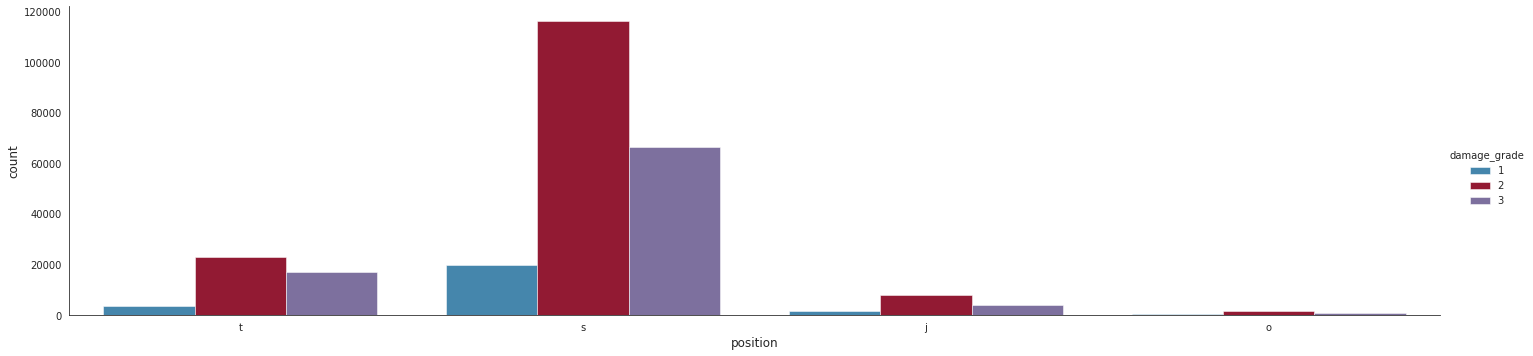

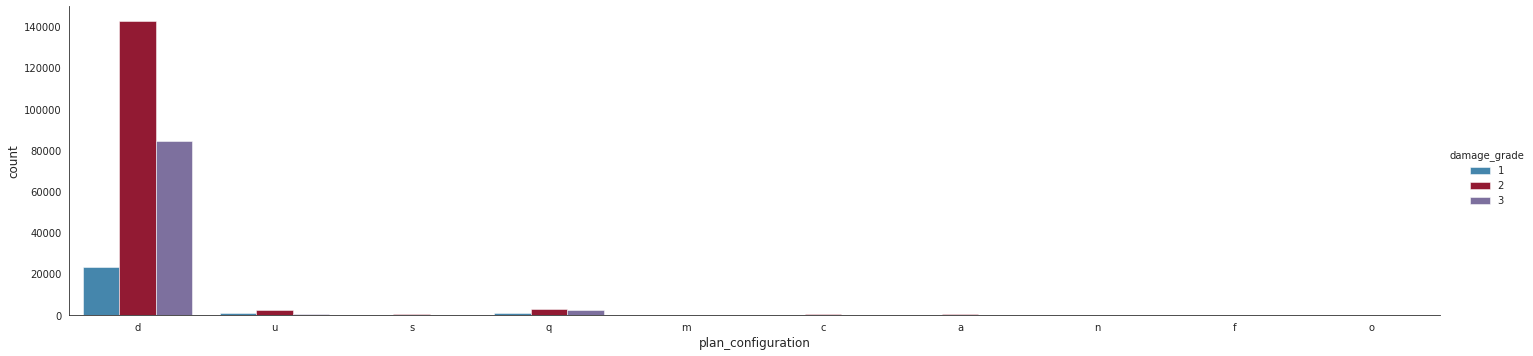

In [62]:
cols = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration']

for col in cols:
    with sns.axes_style('white'):
        g = sns.factorplot(col, data=df, aspect=4.0, kind='count',
                           hue='damage_grade')

In [56]:
cols = ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']

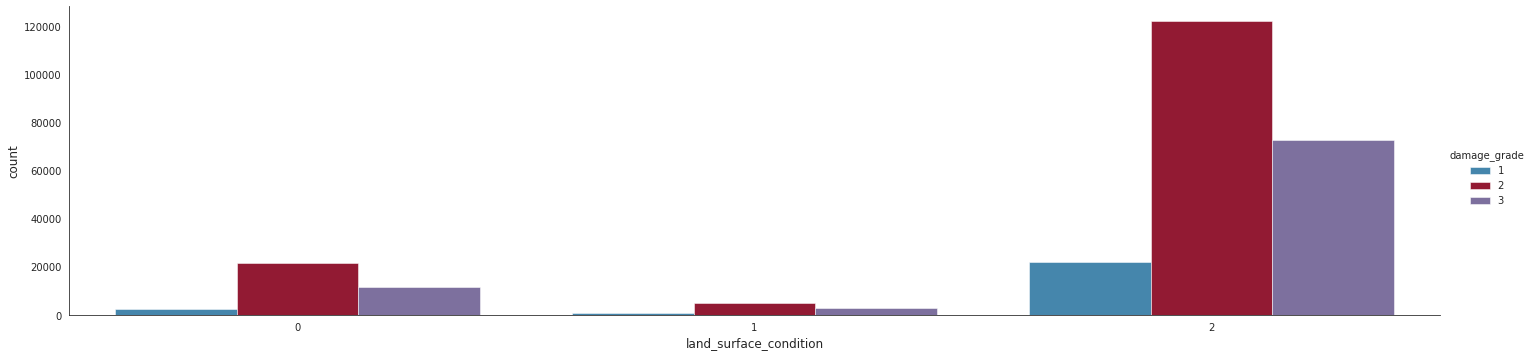

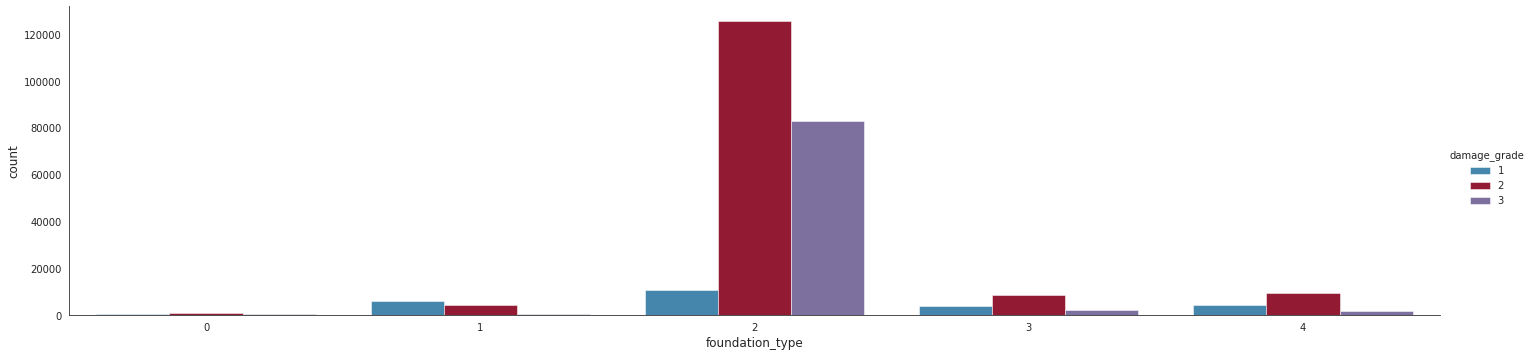

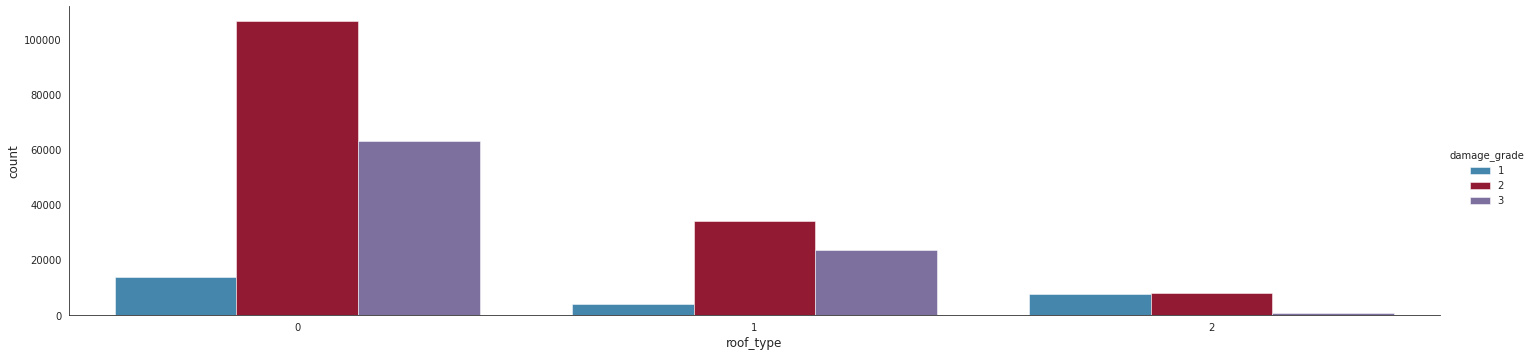

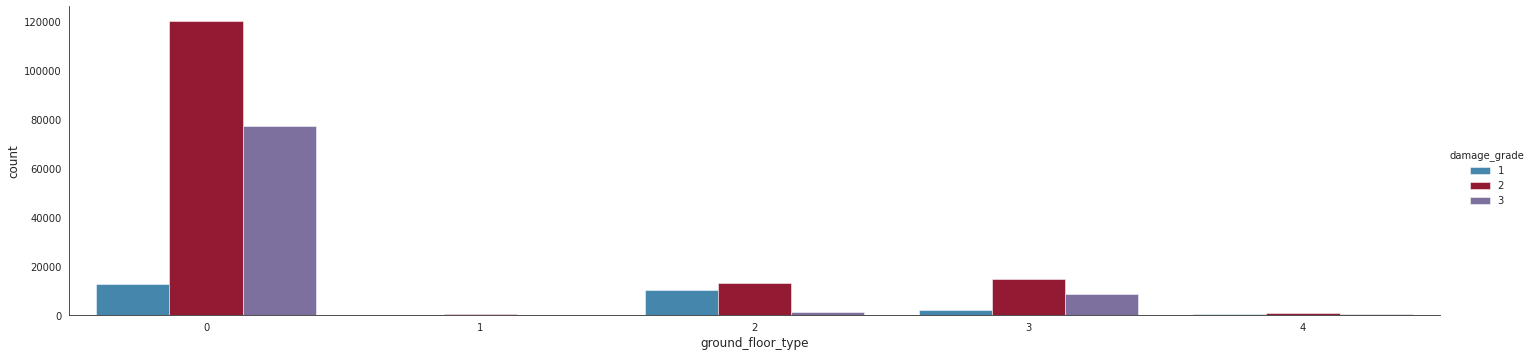

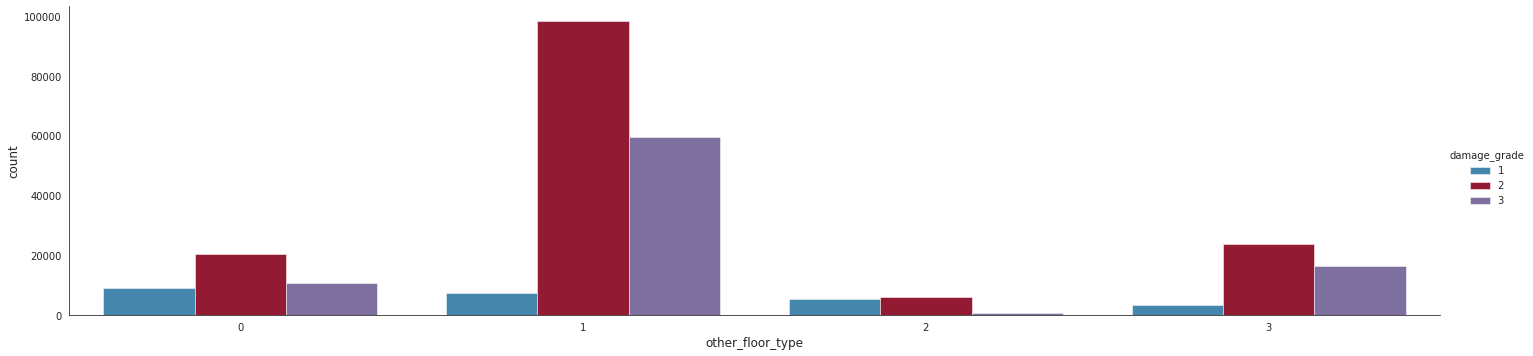

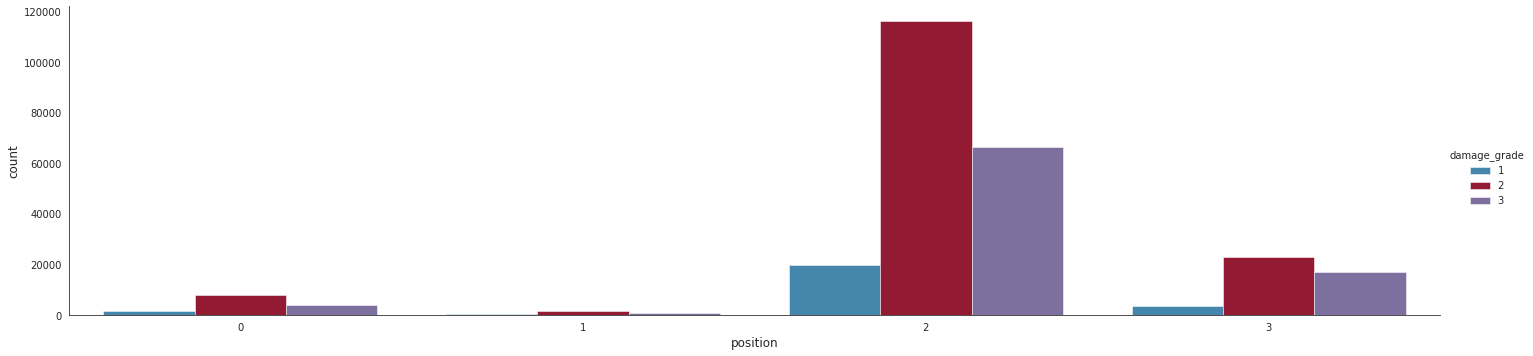

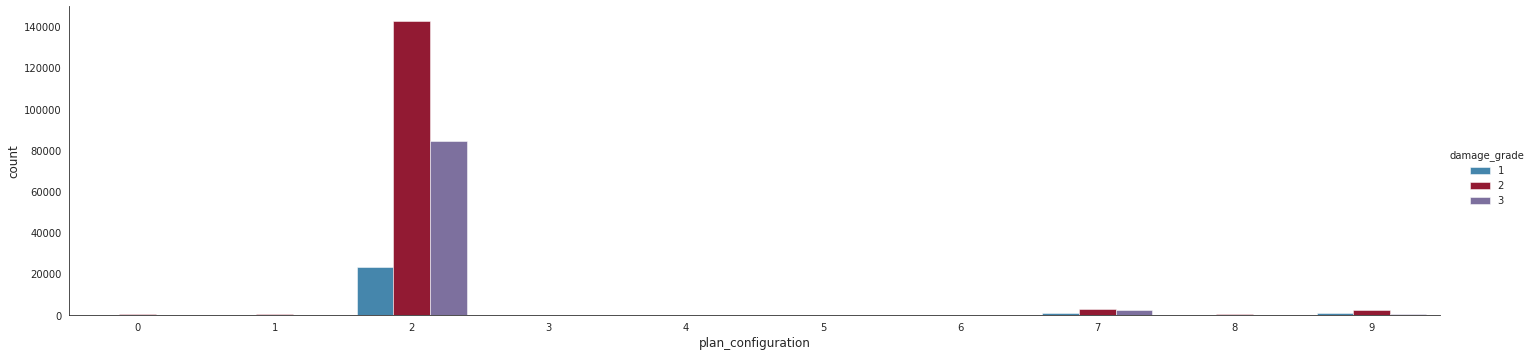

In [104]:
for col in cols:
    with sns.axes_style('white'):
        g = sns.factorplot(col, data=df, kind='count',aspect=4.0,
                           hue='damage_grade')

# Feature Selection

In [38]:
print(len(new_col))
print(features_df.shape)

37
(260601, 38)


# Imports + Data Prep

In [67]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler,LabelEncoder, OrdinalEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from mord import LogisticAT

from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

from catboost import CatBoostClassifier, Pool, cv
set_config(display='diagram')
RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [91]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.20,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

# Catboost 

In [ ]:
train_pool = Pool(data=X_train, label=y_train, cat_features=object_cols)
test_pool = Pool(data=X_eval, label=y_eval, cat_features=object_cols)

#reset model object every time this function is called
model = None

model = CatBoostClassifier(
    iterations= 1500,
    loss_function='MultiClass',
#     l2_leaf_reg=10,
    cat_features=object_cols,
    eval_metric = 'TotalF1',
    use_best_model=True,
    logging_level='Silent')

model = model.fit(train_pool,
          eval_set=test_pool,
          plot=True);

preds_class = model.predict(X_eval)

In [ ]:
display(F'Learning Rate set to: {model.get_all_params()}')
display(F'Accuracy Score: {accuracy_score(y_eval, preds_class)}')
display(F"F1-Score: {f1_score(y_eval, preds_class,average='micro')}")
plot_confusion_matrix(model, X_eval, y_eval)

In [ ]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [ ]:
# compute the SHAP values for every prediction in the validation dataset
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_pool)

In [ ]:
obs=30
y_eval.iloc[obs]

In [ ]:
#define a function to convert logodds to probability for multi-class 
def logodds_to_proba(logodds):
    return np.exp(logodds)/np.exp(logodds).sum()

#generate predictions for our row of data and do conversion
label = model.predict(X_eval)
probas = model.predict_proba(X_eval)
print(probas[obs])
print(label[obs])

In [ ]:
for which_class in range(0,3):
    display(shap.force_plot(explainer.expected_value[which_class], shap_values[which_class][obs],X_eval.iloc[obs,:]))

In [ ]:
shap.summary_plot(shap_values, X_eval)

# Modelling / Pipeline

In [92]:
from imblearn.over_sampling import SMOTE,ADASYN
sm = ADASYN(random_state=RANDOM_SEED,sampling_strategy='auto',n_neighbors=5)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [93]:
y_train['damage_grade'].value_counts()

2    118607
1    118187
3    113154
Name: damage_grade, dtype: int64

In [81]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
object_cols = features_df.columns[features_df.dtypes == "object"].values

In [94]:
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', MinMaxScaler())
#     ('simple_imputer', KNNImputer(n_neighbors=5))
])

In [95]:
categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
])

In [96]:
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps,numeric_cols),
        ('categorical', categorical_transformer,object_cols),
    ])

In [97]:
params= {
         'eval_metric': 'auc',
         'max_depth': 10,
         'min_child_weight': 6,
         'objective': 'multi:softprob',  # error evaluation for multiclass training
         'num_class': 3}

rf_p = { 'bootstrap': True,
         'max_depth': 2000,
         'n_estimators': 2000,
         'n_jobs':-1}

clf_xgb = xgb.XGBClassifier(**params)
clf_rf = RandomForestClassifier(**rf_p)
clf_svc = LinearSVC(C=0.1)
clf_1vR = LogisticRegression(multi_class='ovr',class_weight='balanced')
clf_multi = LogisticRegression(multi_class='multinomial',solver='lbfgs')
clf_ordinal = LogisticAT(alpha=0)
clf_LDA = LinearDiscriminantAnalysis()
clf_KNN = KNeighborsClassifier()

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier",clf_xgb),
])

In [98]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

CPU times: user 11min 41s, sys: 5.77 s, total: 11min 47s
Wall time: 1min 41s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   MinMaxScaler())]),
                                                  array(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'pos...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=10, min_child_weight=6, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_class=3, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [ ]:
cross_val_score(full_pipeline, features_df, labels_df,scoring='f1_micro').mean()

In [99]:
# Predict on evaluation set
preds = full_pipeline.predict(X_eval)

In [100]:
display(F'Accuracy Score: {accuracy_score(y_eval, preds)}')
display(F"F1-Score (Micro): {f1_score(y_eval, preds,average='micro')}")

'Accuracy Score: 0.7253314403023733'

'F1-Score (Micro): 0.7253314403023733'

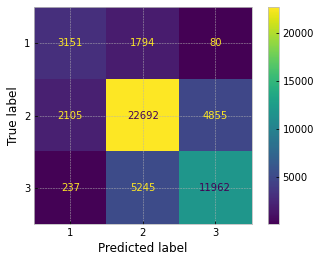

In [101]:
plot_confusion_matrix(full_pipeline, X_eval, y_eval)

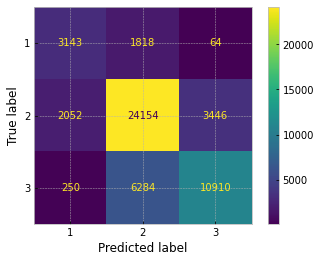

In [89]:
plot_confusion_matrix(full_pipeline, X_eval, y_eval)

# Shap

In [ ]:
mybooster = clf_xgb.get_booster()    
model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray
mybooster.save_raw = myfun
explainer = shap.TreeExplainer(mybooster)
shap_values = explainer.shap_values(X_eval)

In [ ]:
shap_values = explainer.shap_values(X_eval)

In [ ]:
shap.summary_plot(shap_values, X_eval)

# Submission

In [ ]:
test_probas = full_pipeline.predict(test_features_df)

In [ ]:
test_probas = model.predict(test_features_df)

In [ ]:
submission_df = pd.read_csv("submission_format.csv", 
                            index_col="building_id")

np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)

In [ ]:
# Save predictions to submission data frame
submission_df["damage_grade"] = test_probas

submission_df.head()

In [ ]:
submission_df.to_csv('my_submission.csv', index=True)